<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20, slop=[2, 1], intercept=-0.4):
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
Xtr, ytr = criaDatasetBidimensionalBinário(n=20, slop=slop, intercept=intercept)
Xtr, ytr

(array([[0.1484651 , 0.7706767 ],
        [0.98965991, 0.71053479],
        [0.8456939 , 0.81772218],
        [0.4569079 , 0.82676666],
        [0.77825951, 0.16324035],
        [0.24813048, 0.28878661],
        [0.13083318, 0.97963543],
        [0.51255748, 0.47621506],
        [0.1354127 , 0.69588356],
        [0.77702255, 0.10437032],
        [0.38403686, 0.77667401],
        [0.4083317 , 0.04994873],
        [0.20656395, 0.33608676],
        [0.89659635, 0.86212896],
        [0.00380158, 0.79515938],
        [0.5877316 , 0.69459213],
        [0.83416125, 0.30377069],
        [0.87840259, 0.97291881],
        [0.26333043, 0.79615156],
        [0.30379413, 0.54693934]]),
 array([-1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,
         1, -1, -1]))

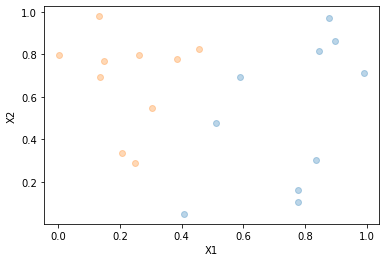

In [78]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

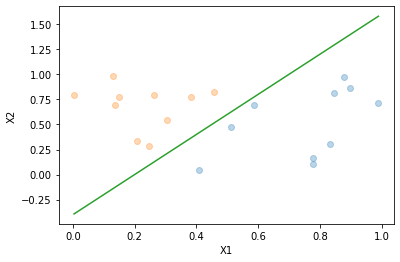

In [80]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [81]:
def sign(a):
  return (a >= 0) * 2 - 1

In [82]:
def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

1.0
[ -7.17574618  35.3523453  -13.97954031]


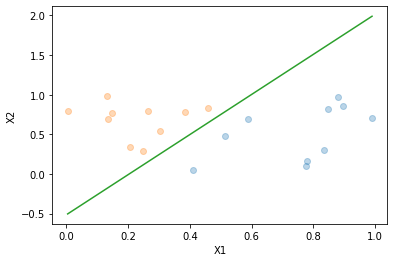

In [102]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
     self.w = None
     self.activation = sign
     self.max_iter = max_iter

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])


0.954


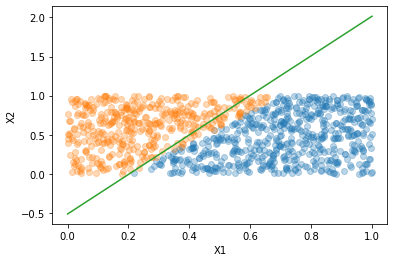

In [103]:
Xte, yte = criaDatasetBidimensionalBinário(1000)
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])